# Math Behind Reinforcement Learning (Not for Dummies)

---

**RL : Agent learns to make decision by interaction with an environment, goal of agent is maximize reward overtime.**

# Basic Component :

1. Agent, Learner/decision maker.
2. Environment, Where agent operates.
3. States(s), current situation of environment.
4. Action(a), what can agent do in that state.
5. Reward(r), feedback after that action(+ or -).
6. Policy(π), strategy that agent follow to choose action.
7. Value Action, Predict how good a state, in term of future r.

---

# Markov Decision Process (MDP)

![](https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/Bellman-Equation.png?ssl=1)

MDP models the environment with this element:

1. State (S)
2. Action (A)
3. Transition Probabilities (P) = P(s'|s,a) : The probability of moving to state s' after taking action a in state s.
4. Reward Funtion (R) = R(s,a) : Expected reward for each state and action
5. Discount Factor (γ) : how much future rewards are worth to immediate ones (0 < γ < 1).

**The Markov Property** : The next state and reward depend only on the current state and action, not on full history.

**Goal of RL** : 

*"Find the expected value ( policy π(a|s) ) that maximizes the expected cumulative reward over time, also called the return"*

or

*"find how valuable a state and action is based on total reward we can get to optimize the policy so we can really get path or rule to follow to get most reward"*

---

# Transition Probability

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*VmV-tIr2e1eX24Y_0KMi5w.png)


**Transition Probability tells that :**

*"if you are in certain situation (state i) and take a certain action. whats the chance you will end up in another situation (next state i+1...)"*

or 

*"If im here and do this, how likely it is making me end up there"*

**for example.**

- you are in a terminal batoh(si) 
- taking bus (ai)
- youre likely 90% probability will go to terminal darussalam(si+1)
- and 30% in terminal ulelue(si+2).
- That 90% probability is transition probabilty p(si+1 | si,ai). 


**But why?..**

Let’s say your RL agent is a robot in a room:

- State s: robot is in the center
- Action a: move north
- New state s’:
- 80% chance: ends up one step north
- 20% chance: slips and stays in place

*"The agent needs to learn that “move north” doesn’t always succeed — this randomness is captured in p(s’|s,a)."*




----

# Return

**Random Variable :**

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*FdQcldGubZNbfJRrh1GO8g.png)



**Return (Random Variable with Discounted Rate) :**

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ZEtDC9eBwSVsQ8_jtnuudg.png)

**Return tells that :**

*"the total reward agent gets from time t onward"*

- γ (gamma) ∈ [0, 1]
- Closer to 1 = future matters more
- Closer to 0 = only cares about immediate reward


**Why?**

*agent goal is maximize Gt, since it tells total reward agent has, and we want to maximize this reward*

**For example..**
- each coin = reward
- Gt = total coins from now until game ends
- Choise :
- stay and get 1 coin
- risk more for now and get 10 coin later
- Gt is there for decide that choise.


*"We model terms like return and value as random variables because the environment is unpredictable — the same action doesn’t always give the same result."*

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*AXQRwn5toJQXcJsBZ8HqMg.png)

---

so, when we goes from state s to next state s' by taking action a. the reward r it gets is not always the same.

*"Reward comes from an unknown distribution - random"*

instead if relying on one time reward, we compute :

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*6bnA-TulIcQDiRH_7_sBRg.png)

or

the expected reward : E[r | s, a, s’] 

*"the average of all possible rewards for that transition."*

for example ..

- at casino
- pull a lever (action a) many time
- each time, even the a is same, reward might be different. (5 coin, 10 coin, and even 0)

*'we didnt know exact reward we get next, but overtime, we can estimate'*

- on average, the lever (action a) gives me 6 coin, so thats 6 coin is our expected reward.

*"reward now and next reward in same action over time is being averaged"*

---

# State Value Function 

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*IYC5S0lG7ov-surZ9wwMfg.png)

*"How good s is considering future reward(γ)"*

take a not that π is a policy that agent need to follow, for example taking a bus in a terminal (s), policy is like 50% end up in s1, and 50% end up in s2. What we want to do is calculate expactation of every possible reward output following that policy.



---

# Action Value Function

![](https://miro.medium.com/v2/resize:fit:1112/format:webp/1*7W4D6K3VtzNR7RT_y-ijmg.png)

*"How good a is considering reward by taking a action in s"*


---

# Expected Return

In reinforcement learning (RL), we are trying to predict future rewards based on current states and actions. This involves a lot of expectation calculations because rewards are not deterministic — they depend on probabilities (transition, randomness, policy, etc.).


Case : Frozen Lake Semplify

1. Environment

S  F  F  F  
F  H  F  H  
F  F  F  H  
H  F  F  G

2. State (S)

- S0 : Start
- S1, S2, S3, S4, S6, S8, S9, S10, S13, S14 : Frozen (Safe)
- S5, S7, S11, S12 : Hole (-1)
- S15 : Goal (+1)

3. Action (A)

- Up (0)
- Right (1)
- Down (2)
- Left (3)

Act

S = S10 (Safe)

A = 1

S' = S11 (Holes)

R = -1


## Transition Probability

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*VmV-tIr2e1eX24Y_0KMi5w.png)

*"if you are in certain situation (state i) and take a certain action. whats the chance you will end up in another situation (next state i+1...)"*

Ex

- S = 0 (Start)
- A = 1 (Right)

1. Slippery :
- 0.8 -> Right (A1) (S1)
- 0.1 -> Up (A0) (S0)
- 0.1 -> Down (A2) (S4)

2. That is Transition Probability
- Not Slippery : S(0)xA(1) -> P(s' = 1 | s = 0, a = 2) = 1.0
- Slippery : S(0)xA(1)
- -> P(s' = 1 | s = 0, a = 2) = 0.8
- -> P(s' = 1 | s = 0, a = 2) = 0.1
- -> P(s' = 1 | s = 0, a = 2) = 0.1

3. Add Reward
- -> P(s' = 1, R = 0 | s = 0, a = 2) = 0.8
- -> P(s' = 1, R = 0 | s = 0, a = 2) = 0.1
- -> P(s' = 1, R = 0 | s = 0, a = 2) = 0.1


4. conditoional probability and expectation

## Joint Probability

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*D9MvLB64amhPcIqmcq1Vbg.png)

*"Whats the Probability both Happen?"*

![](https://miro.medium.com/v2/resize:fit:1110/format:webp/1*f8Smz6vvlrR3NVgcsiMn4A.png)


Ex. 

P(S = 0, A = 2 , S' = 1 , R = 0) 

= P(S = 0) x P(A = 2 | S = 0) x P(S' = 1 , R = 0 | S = 0, A = 2)


## Marginal Probability

*"Whats the Probability of Just One no matter what the other is?"*

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*MzDo4o_BThIAtkMacs8S7g.png)

and 

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*GbBm8DHKPP7D9OqqHXPb9w.png)

Ex.

P(S' = 1) = Σ x Σ P(S = s , A = a, S' = 1)

## Conditional Probability

*"Whats the chance of X = x given Y = y happened? "*

![](https://miro.medium.com/v2/resize:fit:1288/format:webp/1*RXhrdunWTXL7GTVJP1GR0w.png)

Ex.

P(S' = 1 | S = 0, A = 2) = 0.8


## Expectation (Average)

![](https://miro.medium.com/v2/resize:fit:750/format:webp/1*dMkX_6HSWMvp87cy-r5f9A.png)

*"Average Outcomes, but weighted by how likely each outcome is"*

Ex. 

E[R] = Σ x Σ E[R | S = a, A = a] x P(S = s, A = a)
 

## Return

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ZEtDC9eBwSVsQ8_jtnuudg.png)

*"the total reward agent gets from time t onward"*

## Policy

*π(a|s)*

Ex. 

- Policy : always a = 2 (Right)
- π(2 | 0) = 1

## State Value Funtion

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*IYC5S0lG7ov-surZ9wwMfg.png)

*"How good a state is considering future reward(γ), following π, taking action a"*

Ex. 

- π(2 | 0) = 1
- Vπ(0) = E[Gt | St = 0]
- value that state is a total reward it get start with that state and following policy and take action untill reach goal.


## Action Value Function

![](https://miro.medium.com/v2/resize:fit:1112/format:webp/1*7W4D6K3VtzNR7RT_y-ijmg.png)

*"How good a is considering reward by taking a action in s"*

Ex. 

- S = 0
- A = 0

- Qπ(0 , 2) = E(Gt | St = 0, At = 2)
- value that state is a total reward get if using that action in a state.

# Example..

## State Funtion & Action Funtion

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*uUo6Dvww9RoU5ui4AjQ-Sw.png)  

- State : S(0), S(1), S(2), S(3), S(4)
- Action : A(1), A(2)
- π :
- -> A(1) = 50%
- -> A(2) = 50%


- ![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*tY5-FQhm5N3TKDz8LRxSoQ.png)
- Vπ(S(0)) : how good that state if we start from there and follow policy(π) which is what action we take.
- Vπ(S(0)) = 50% x Qπ(A(1), S(0)) + 50% x Qπ(A(2), S(0))
- Vπ(S(0)) : possibility taking action A(1) from S(0) + possibility taking A(2) from S(0).

- ![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*BZ55CjzqvpeSXM4QiaWDQw.png)
- Qπ(A(1), S(0)) : value of A(1) taked from S(0), is total expected reward we get if we taking that action (A(1)) from State S(0).
- Qπ(A(1), S(0)) = 70% x {E[R | S0, A1, S1] + Vπ (S1)} + 30% x {E[R | S0, A1, S2] + Vπ (S2)}
- Qπ(A(1), S(0)) : possibility of reward we can get by taking action A1 to S1 + possibility of reward we can get by taking action A2 to S2.





**Now** how we know expected reward we can get by taking action A from S?

## Expected Reward

- ![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*LeEHhZ5cRrNISuQSNUIdbw.png)

**Ex .**

\begin{bmatrix}
S(0)  S(1) \\
 \\
S(2)  S(3) \\
\end{bmatrix}

- Start :s0
- Goal : s3, r = +1
- Hole : s1, r = 0
- s2 = r = 0

- Probabilistik (Slippery)



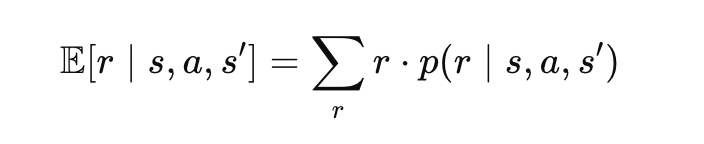

*"Expected (average) reward we can get if we start from S, taking action A, end up to S'"*.

but we cant calculate it directly because the value isnt define yet, so we can use equation.

### Bayes Theorem

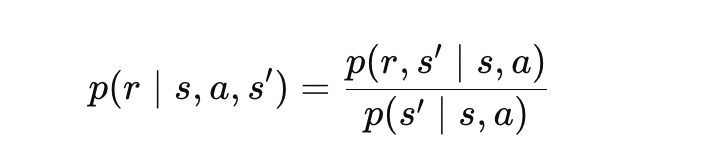

Expected Reward is : 

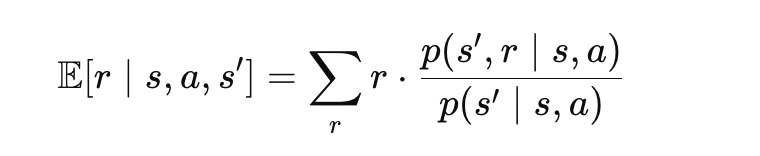

*"All reward x Probability get each reward and go to S' / Probability go to S' after S with A."*


or

*"How much reward we getm if we end up in s' after taking action from s, assume we know that s'"*

- s2 -> a2 -> s3
- P(s', r | s, a) / P(s' | s, a)
- P(s' = 3, r = 1| s = 2, a = rigth) = 0.8
- P(s' = 3 | s = 2, a = action) = 0.8
- E(r | s = 2, a = rigth, s' = 3) = r x 0.8/0.8 = 1


---

## Bellman Equation for Action Value Function - Q(s,a) 

![](https://miro.medium.com/v2/resize:fit:1112/format:webp/1*7W4D6K3VtzNR7RT_y-ijmg.png)

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*BZ55CjzqvpeSXM4QiaWDQw.png)

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*O-wNSKgUYYD9Pyel-pwMfA.png)

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*TcgapTh9F2HATVenie92Tg.png)

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*0fj6e6MEBxDCiSAhwYSAZQ.png)



The main goal of qπ(s , a) is expected(average) reward when start from s, taking action a, and follow policy π.

main equation :


![](https://miro.medium.com/v2/resize:fit:1112/format:webp/1*7W4D6K3VtzNR7RT_y-ijmg.png)

same as :

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*BZ55CjzqvpeSXM4QiaWDQw.png)

from expected reward equation earlier :

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*O-wNSKgUYYD9Pyel-pwMfA.png)

*"total of All reward x Probability get each reward and go to S' / Probability go to S' after S with A. + total expected future value from next state."*


Now, we know that transition probability is :

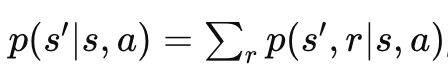

*"probability end up in s' from s taking action a is all reward we can get taking that action is reward we can get by doing that."*

so..

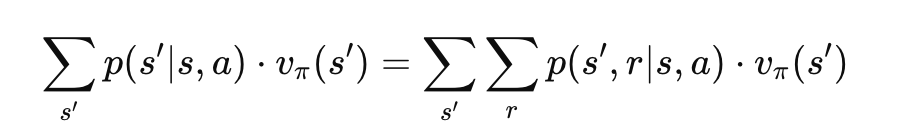

*"total probability end up in total next state by taking action a from previous state is total probability reward we can get taking action from s to next state and then the next state value following policy"*

then just take that to our action value funtion :

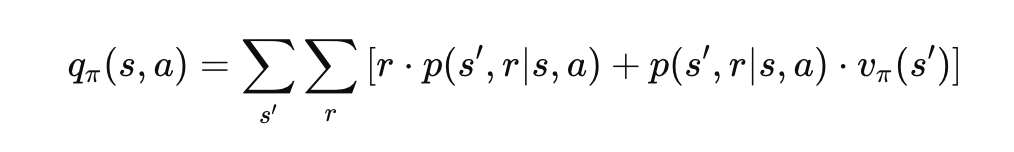

*"action value function or how valueable an action is if we take it to move from s to s' is total of reward we can get taking that action to move from s to s' and also total reward for each next taking same action follow policy untill goal"*

by factorizing p(s', r | s , a) :

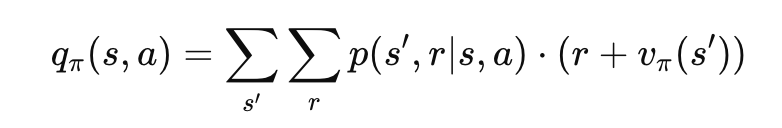

*"value of an action a for moving a state s, is total of expected reward taking that action start from s times reward can get for the next value state untill goal"*

**Example**

**Mdp :** 
- s1 -> s2 , r1 = +5
- s2 -> s1 , r2 = +2
- a1, a2



**Policy π (deterministik) :**
- π(a1 | s1) = 1 (always take a1 in s1, a1 in s2 = 0%)
- π(a2 | s2) = 1 (always take a2 in s2, a2 in s1 = 0%)

**Transition Probabilities p(s'| s , a) :**

1. p(s2| s1 , a1) = p(s2, r1 | s1, a1)
- *"transition probability value from s1 to s2 taking a1 is total probability reward we can get taking a1 to move from s1 to s2"*.
- p(s2, r1 | s1, a1) = 1

- p(s2, r1 | s1, a2) = 0

2. p(s1| s2 , a2) = p(s1, r2 | s2, a2)
- *"Transition probability value from s2 to s1 taking a2 is total probability reward we can get taking a2 to move from s2 to s1"*

- p(s1, r2 | s1, a2) = 1

- p(s1, r2 | s1, a1) = 0


**Action Value Function qπ(s , a) :**

1. qπ(s1 , a1)
- qπ(s1 , a1) = ΣΣ p(s', r | s1, a1) x (r + Vπ(s'))
- p(s2, r1 = 5 | s1, a1) = 1
- qπ(s1 , a1) = 1 x (5 + Vπ(s2))
- qπ(s1 , a1) = 5 + Vπ(s2)

2. qπ(s2 , a2)
- qπ(s2 , a2) = ΣΣ p(s', r | s2, a2) x (r + Vπ(s'))
- p(s1, r2 = 2 | s2, a2) = 1
- qπ(s2 , a2) = 1 x (2 + Vπ(s1))
- qπ(s2 , a2) = 2 + Vπ(s1)


**State Value Function Vπ(s) :**

1. Vπ(s1)
- Vπ(s1) = qπ(s1 , a1)
- Vπ(s1) = 5 + Vπ(s2)

2. Vπ(s2)
- Vπ(s2) = qπ(s2 , a2)
- Vπ(s2) = 2 + Vπ(s1)

3. γ = 0.9
- Vπ(s1) = 5 + γxVπ(s2)
- Vπ(s1) = 5 + 0.9xVπ(s2)
- Vπ(s2) = 2 + γxVπ(s1)
- Vπ(s2) = 2 + 0.9xVπ(s1)

4. Vπ(s2)
- Vπ(s2) = 2 + 0.9 x Vπ(s1)
- Vπ(s2) = 2 + 0.9 x (5 + 0.9xVπ(s2))
- Vπ(s2) = 2 + 0.9 x 5 + 0.9 x 0.9 x Vπ(s2))
- Vπ(s2) = 2 + 0.9 x 5 + 0.81 x Vπ(s2))
- Vπ(s2) - 0.81Vπ(s2)) = 6.5
- 0.19Vπ(s2) = 6.5
- Vπ(s2) = 6.5/0.19
- Vπ(s2) = 34.21

5. Vπ(s1) 
- Vπ(s1) = 5 + 0.9 x Vπ(s2)
- Vπ(s1) = 5 + 0.9 x (34.21)
- Vπ(s1) = 35.79

**Action Value Function qπ(s , a) knowing V(s):**

1. qπ(s1 , a1)
- qπ(s1 , a1) = 5 + Vπ(s2)

2. qπ(s2 , a2)
- qπ(s2 , a2) = 2 + Vπ(s1)

3. γ = 0.9
- qπ(s1 , a1) = 5 + γxVπ(s2)
- qπ(s1 , a1) = 5 + 0.9xVπ(s2)
- qπ(s2 , a2) = 2 + γxVπ(s1)
- qπ(s2 , a2) = 2 + 0.9xVπ(s1)

4. qπ(s1 , a1)
- qπ(s1 , a1) = 5 + 0.9 x (34.21)
- qπ(s1 , a1) = 35.79

5. qπ(s2 , a2)
- qπ(s2 , a2) = 2 + 0.9 x (35.79)
- qπ(s2 , a2) = 34.21



## Bellman Equation for State Value Function - V(s) 


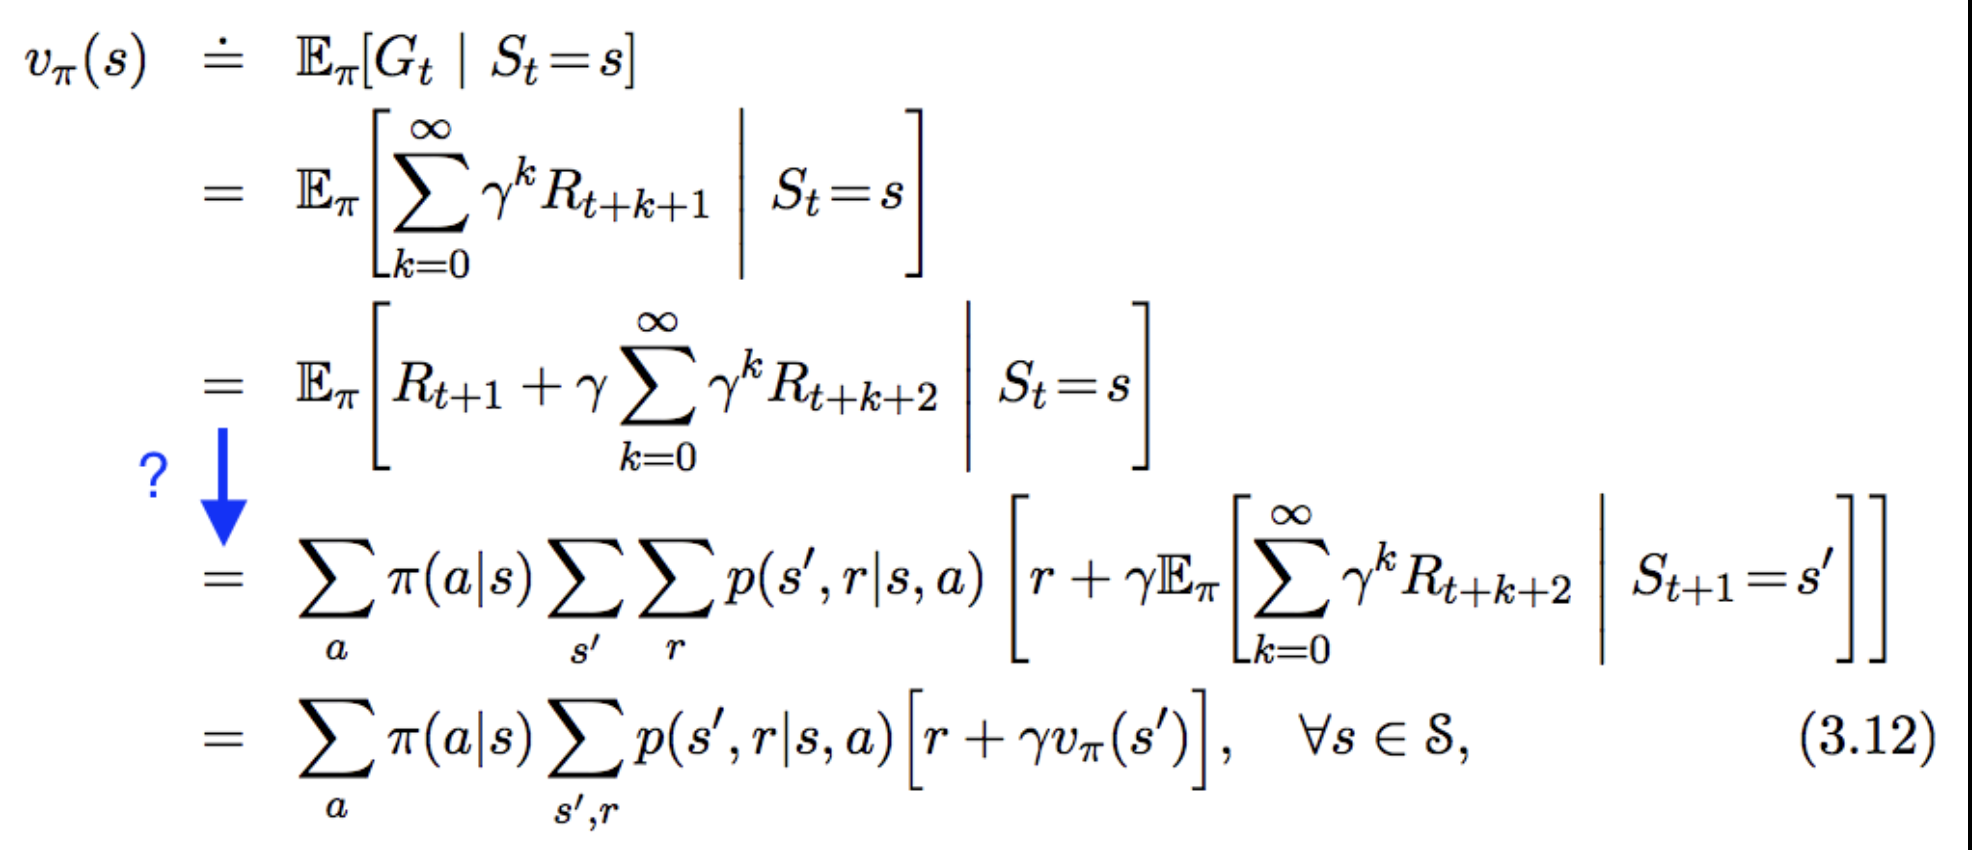


![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*FtUi0CFXB6S2f81ofE__Eg.png)

*"Vπ(s) or value of a state is get starting from that state s, follow policy to all action a to move to all possible s' and get all possible reward"*

both bellman will update each value of state and action to be more good based on total reward now and future.

**Example :**

**MDP :**

- s1 -> a1 -> s2 , r1 = 0
- π(s1 | a1) : 1 (deterministik)
- Vπ(s') = Vπ(s2) : 0.5 

**State Value Function Vπ(s) :**

- Vπ(s) = ΣΣ p(s', r | s, a) x (r + γxVπ(s'))
- Vπ(s1) = ΣΣ p(s2, r1 | s1, a1) x (r1 + 0.9xVπ(s2))
- p(s2, r1 | s1, a1) = 1
- Vπ(s1) = 1 x (0 + 0.9x0.5)
- Vπ(s1) = 1 x 0 + 1x0.9x0.5)
- Vπ(s1) = 0.45


---

## Policy π Optimization

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*vau3fbxwTbsMRzF02ELtlA.png)

*"The main goal of rl is to get most reward, it can be done by optimizing policy, by optimizing state value funtion and action value function"*

- Value Iteration : Vπ(s) is optimal and qπ(s,a)
  
![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*fdyp0VESw_PUFcCO_C3-pA.png)

*"vπ(s) = is a expected reward start from that state, max(vπ(s)) = is s that has the most reward get, start from it. that is equal to max(qπ(s,a)) = is best action to make the most reward onward, or choosing the best action for every best state that has the most reward onward"*

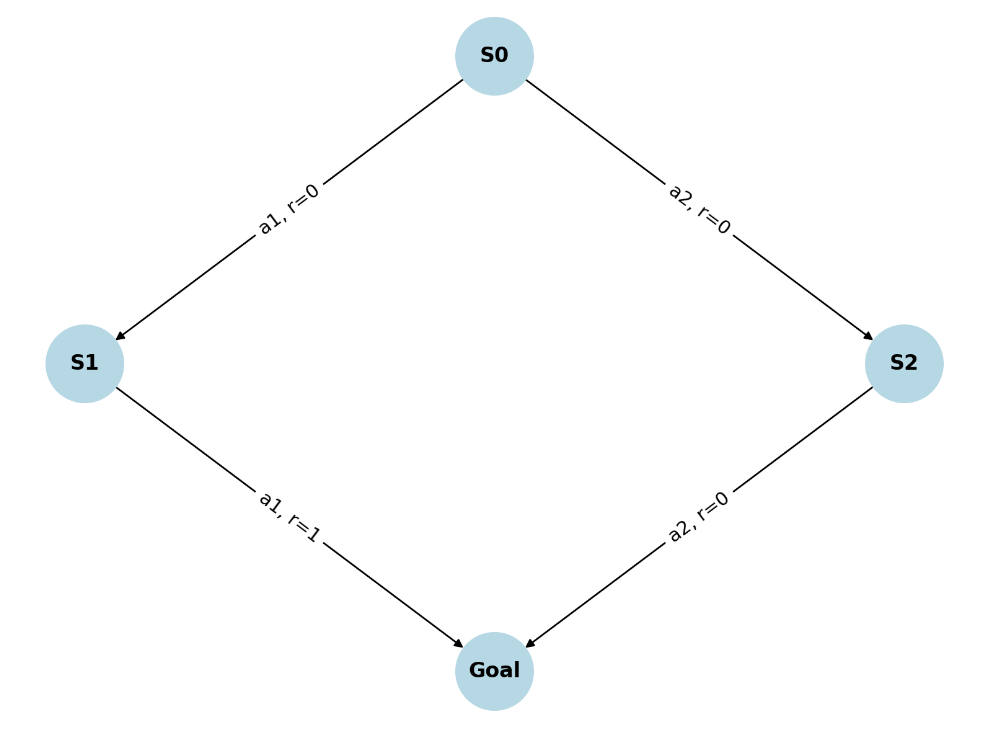


### Policy Iteration 

1. Policy Evalutaion : Vπ(si) for all state i, based on i policy.
2. Policy Improvement : Optimize π(s,a) based on each Vπ(si) then taking best action.
3. Ex.
    - s0 -> a2 -> s2
    - s1 -> goal
    - s2 -> goal
    - **π(s,a) Evaluation :**
    - = Vπ(si)
    - = Vπ(s0), Vπ(s1), Vπ(s2) (Bellman Vπ(si) Equation)
    - **π(s,a) Improvement :**
    - = s0 -> a? -> r
    - = s0 -> a1 -> r = 1
    - = π(s,a) = s0 -> a1 -> s1 -> a1 -> r = 1 -> goal

### Value Iteration

1. Optimize Vπ(s) and qπ(s , a)
2. π(s,a) = max(qπ(s , a)) - *"Taking best action from state s that get most reward"*
3. Ex.
   - s0 -> a1 -> s1 -> a1 -> goal -> reward = 1
   - s0 -> a2 -> s2 -> a2 -> goal -> reward = 0
   - Vπ(s0) = max(0 + γxVπ(s1) + γxVπ(s2))
   - Vπ(s1) = ...
   - Vπ(s) the most is the policy we take.

---

# Example - Frozen Lake

Environment:


\begin{bmatrix}
🤖 & ⬜ & ⬜  & ⬜ \\
⬜ & 🕳 & ⬜  & 🕳 \\
⬜ & ⬜ & ⬜  & 🕳 \\
🕳 & ⬜ & ⬜  & 🏁 \\
\end{bmatrix}


Keterangan:
- 🤖 = Start (1,1)
- 🕳 = Hole (jatuh = game over)
- 🏁 = Goal (finish)
- ⬜ = Safe (jalan beku)


Main Goal : Reward Tertinggi

Main Process :

1. Define State and Action (S dan A)

2. Define Reward and Transition Probabilities (R dan P(s'|s,a))

3. Value Initialization

4. Value Iteration

5. Q Value

6. Policy Extraction (Optimum Policy)


**MDP - Markov Decision Process**

\begin{bmatrix}
 s0 (🤖) & s1  (⬜) & s2  (⬜) & s3  (⬜) \\
 s4 (⬜) & s5  (🕳) & s6  (⬜) & s7  (🕳) \\
 s8 (⬜) & s9  (⬜) & s10 (⬜) & s11 (🕳) \\
s12 (🕳) & s13 (⬜) & s14 (⬜) & s15 (🏁) \\
\end{bmatrix}



---

### Setup Grid World

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Setup grid
grid = np.array([
    ['S', 'F', 'F', 'F'],
    ['F', 'H', 'F', 'H'],
    ['F', 'F', 'F', 'H'],
    ['H', 'F', 'F', 'G']
])

# Definisi action
actions = ['U', 'D', 'L', 'R']
action_to_delta = {
    'U': (-1, 0),
    'D': (1, 0),
    'L': (0, -1),
    'R': (0, 1)
}

# Reward function
def get_reward(state):
    x, y = state
    if grid[x][y] == 'G':
        return 1.0
    elif grid[x][y] == 'H':
        return 0.0
    return 0.0

# Cek apakah state valid
def is_valid(state):
    x, y = state
    return 0 <= x < 4 and 0 <= y < 4 and grid[x][y] != 'H'

---

### Value Iteration

In [10]:
gamma = 0.9
theta = 1e-4

V = np.zeros((4, 4))
policy = np.full((4, 4), ' ')

iteration = 0
while True:
    delta = 0
    new_V = V.copy()
    for i in range(4):
        for j in range(4):
            if grid[i][j] in ['H', 'G']:
                continue
            values = []
            for a in actions:
                dx, dy = action_to_delta[a]
                ni, nj = i + dx, j + dy
                if 0 <= ni < 4 and 0 <= nj < 4 and grid[ni][nj] != 'H':
                    reward = get_reward((ni, nj))
                    values.append((reward + gamma * V[ni][nj], a))
                else:
                    values.append((0 + gamma * V[i][j], a))  # stay in place if invalid
            best_value, best_action = max(values)
            new_V[i][j] = best_value
            policy[i][j] = best_action
            delta = max(delta, abs(best_value - V[i][j]))
    V = new_V
    iteration += 1
    if delta < theta:
        break

---

### Visualisasi: State Value Function + Policy

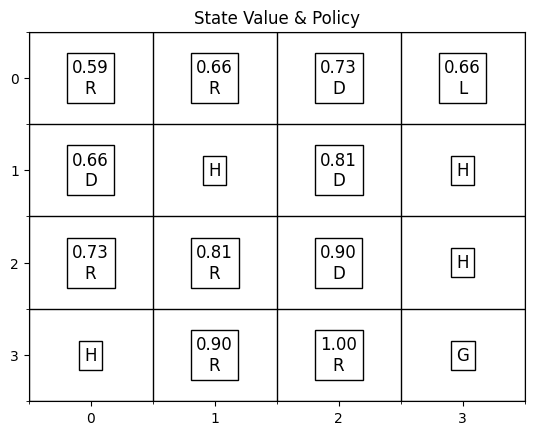

In [11]:
def plot_values_and_policy(V, policy, title="State Value & Policy"):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xticks(np.arange(4))
    ax.set_yticks(np.arange(4))
    ax.invert_yaxis()
    for i in range(4):
        for j in range(4):
            value = V[i][j]
            action = policy[i][j]
            text = f"{value:.2f}\n{action}" if grid[i][j] not in ['H', 'G'] else grid[i][j]
            ax.text(j, i, text, ha='center', va='center', fontsize=12,
                    bbox=dict(facecolor='white', edgecolor='black'))
    ax.set_xticks(np.arange(-.5, 4, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 4, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
    plt.show()

plot_values_and_policy(V, policy)

---

### Tabel Action-Value Function (Q-values)

In [13]:
Q = np.zeros((4, 4, len(actions)))

for i in range(4):
    for j in range(4):
        if grid[i][j] in ['H', 'G']:
            continue
        for a_idx, a in enumerate(actions):
            dx, dy = action_to_delta[a]
            ni, nj = i + dx, j + dy
            if 0 <= ni < 4 and 0 <= nj < 4 and grid[ni][nj] != 'H':
                reward = get_reward((ni, nj))
                Q[i, j, a_idx] = reward + gamma * V[ni][nj]
            else:
                Q[i, j, a_idx] = 0 + gamma * V[i][j]

# Visualisasi Q-table
q_data = []
for i in range(4):
    for j in range(4):
        for a_idx, a in enumerate(actions):
            q_data.append({
                'State': f'({i},{j})',
                'Action': a,
                'Q(s,a)': Q[i, j, a_idx]
            })

df_q = pd.DataFrame(q_data)
print(df_q.pivot(index='State', columns='Action', values='Q(s,a)').round(2))

Action     D     L     R     U
State                         
(0,0)   0.59  0.53  0.59  0.53
(0,1)   0.59  0.53  0.66  0.59
(0,2)   0.73  0.59  0.59  0.66
(0,3)   0.59  0.66  0.59  0.59
(1,0)   0.66  0.59  0.59  0.53
(1,1)   0.00  0.00  0.00  0.00
(1,2)   0.81  0.73  0.73  0.66
(1,3)   0.00  0.00  0.00  0.00
(2,0)   0.66  0.66  0.73  0.59
(2,1)   0.81  0.66  0.81  0.73
(2,2)   0.90  0.73  0.81  0.73
(2,3)   0.00  0.00  0.00  0.00
(3,0)   0.00  0.00  0.00  0.00
(3,1)   0.81  0.81  0.90  0.73
(3,2)   0.90  0.81  1.00  0.81
(3,3)   0.00  0.00  0.00  0.00


---

### Detail Perhitungan

In [15]:
import pandas as pd
import numpy as np

# Grid and actions
grid = np.array([
    ['S', 'F', 'F', 'F'],
    ['F', 'H', 'F', 'H'],
    ['F', 'F', 'F', 'H'],
    ['H', 'F', 'F', 'G']
])

actions = ['U', 'D', 'L', 'R']
action_to_delta = {
    'U': (-1, 0),
    'D': (1, 0),
    'L': (0, -1),
    'R': (0, 1)
}

# Rewards and helper functions
def get_reward(state):
    x, y = state
    if grid[x][y] == 'G':
        return 1.0
    elif grid[x][y] == 'H':
        return 0.0
    return 0.0

def is_valid(state):
    x, y = state
    return 0 <= x < 4 and 0 <= y < 4 and grid[x][y] != 'H'

# Value iteration parameters
gamma = 0.9
theta = 1e-4
V = np.zeros((4, 4))
policy = np.full((4, 4), ' ')
Q = np.zeros((4, 4, len(actions)))

# Run value iteration
while True:
    delta = 0
    new_V = V.copy()
    for i in range(4):
        for j in range(4):
            if grid[i][j] in ['H', 'G']:
                continue
            values = []
            for a in actions:
                dx, dy = action_to_delta[a]
                ni, nj = i + dx, j + dy
                if 0 <= ni < 4 and 0 <= nj < 4 and grid[ni][nj] != 'H':
                    reward = get_reward((ni, nj))
                    values.append((reward + gamma * V[ni][nj], a))
                else:
                    values.append((0 + gamma * V[i][j], a))  # stay in place if invalid
            best_value, best_action = max(values)
            new_V[i][j] = best_value
            policy[i][j] = best_action
            delta = max(delta, abs(best_value - V[i][j]))
    V = new_V
    if delta < theta:
        break

# Calculate Q-values
for i in range(4):
    for j in range(4):
        if grid[i][j] in ['H', 'G']:
            continue
        for a_idx, a in enumerate(actions):
            dx, dy = action_to_delta[a]
            ni, nj = i + dx, j + dy
            if 0 <= ni < 4 and 0 <= nj < 4 and grid[ni][nj] != 'H':
                reward = get_reward((ni, nj))
                Q[i, j, a_idx] = reward + gamma * V[ni][nj]
            else:
                Q[i, j, a_idx] = 0 + gamma * V[i][j]

# Create detailed DataFrame
rows = []
for i in range(4):
    for j in range(4):
        if grid[i][j] in ['H', 'G']:
            continue
        for a_idx, a in enumerate(actions):
            dx, dy = action_to_delta[a]
            ni, nj = i + dx, j + dy
            next_state = (ni, nj) if 0 <= ni < 4 and 0 <= nj < 4 and grid[ni][nj] != 'H' else (i, j)
            reward = get_reward(next_state)
            transition_prob = 1.0  # deterministic
            v_sp = V[next_state]
            q_sa = Q[i, j, a_idx]
            v_s = V[i, j]
            bellman = reward + gamma * v_sp
            rows.append({
                'State': f'({i},{j})',
                'Action': a,
                'Next State': f'({next_state[0]},{next_state[1]})',
                'Reward': reward,
                'Transition Prob': transition_prob,
                'V(s\')': round(v_sp, 4),
                'Bellman (s)': round(bellman, 4),
                'Q(s,a)': round(q_sa, 4),
                'V(s)': round(v_s, 4)
            })

df_full = pd.DataFrame(rows)
df_full

,State,Action,Next State,Reward,Transition Prob,V(s'),Bellman (s),"Q(s,a)",V(s)
0,"(0,0)",U,"(0,0)",0.0,1.0,0.5905,0.5314,0.5314,0.5905
1,"(0,0)",D,"(1,0)",0.0,1.0,0.6561,0.5905,0.5905,0.5905
2,"(0,0)",L,"(0,0)",0.0,1.0,0.5905,0.5314,0.5314,0.5905
3,"(0,0)",R,"(0,1)",0.0,1.0,0.6561,0.5905,0.5905,0.5905
4,"(0,1)",U,"(0,1)",0.0,1.0,0.6561,0.5905,0.5905,0.6561
5,"(0,1)",D,"(0,1)",0.0,1.0,0.6561,0.5905,0.5905,0.6561
6,"(0,1)",L,"(0,0)",0.0,1.0,0.5905,0.5314,0.5314,0.6561
7,"(0,1)",R,"(0,2)",0.0,1.0,0.7290,0.6561,0.6561,0.6561
8,"(0,2)",U,"(0,2)",0.0,1.0,0.7290,0.6561,0.6561,0.7290
9,"(0,2)",D,"(1,2)",0.0,1.0,0.8100,0.7290,0.7290,0.7290


---

### Visualization State Value Function on Environment

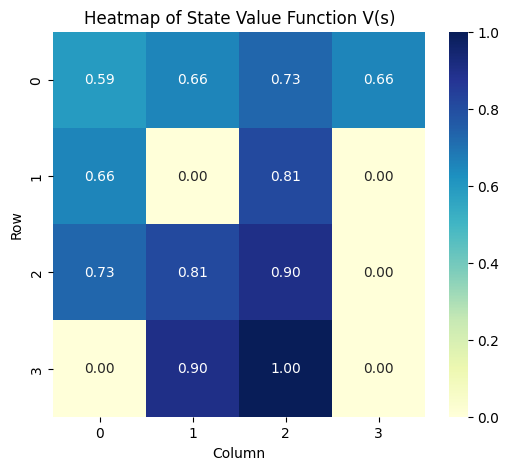

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ambil nilai V(s) hasil dari value_iteration
V_values = V.reshape((4, 4))  # reshape dari 1D ke 4x4 grid

plt.figure(figsize=(6, 5))
sns.heatmap(V_values, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)

plt.title("Heatmap of State Value Function V(s)")
plt.xlabel("Column")
plt.ylabel("Row")  # biar posisi (0,0) di kiri atas
plt.show()

---

# Example - Lunar Lander

### State

every grid as state (5x5) then, 25 state


\begin{bmatrix}
  0 (🤖) & 1 (⬜) & 2 (⬜) & 3 (⬜) & 4 (⬜) \\
  5 (⬜) & 6 (🕳) & 7 (⬜) & 8 (⬜) & 9 (🕳) \\
 10 (⬜) & 11 (⬜) & 12 (⬜) & 13 (⬜) & 14 (🕳) \\
 15 (⬜) & 16 (⬜) & 17 (⬜) & 18 (⬜) & 19 (⬜) \\
 20 (🕳) & 21 (⬜) & 22 (⬜) & 23 (⬜) & 24 (🏁) \\
\end{bmatrix}

State :

- Start: state 0 (1,1)
- Goal: state 24 (5,5)
- Holes: state 6 (2,2), 9 (2,5), 14 (3,5), 20 (5,1)
- Else : Common

### Action

Move :

- Up (U)
- Down (D)
- Left (L)
- Right (R)

Probability every action :

- Success to that direction
- Fail end end up to wrong direction (Assume Slippery)



---

### Rewards :

> Assume Environtment not Slippery so every action is deterministik (can we control)

Reward :
- Reward = 1 if reach the goal S24(5,5)
- Reward = 0 for common move (State Common)
- Reward = 0 or -1 if enter holes (for now 0)

### Transition Function (P(s'|s,a))

*"probability end up in s' if in s take a"*

> Assume Environtment not Slippery so every action is deterministik (can we control)

In [57]:
import pandas as pd
df = pd.read_csv("assets/state_transitions.csv")
df.head(10)

,state,action,next_state,probability
0,"0(1,1)",up,-,-
1,"0(1,1)",down,"5(2,1)",1
2,"0(1,1)",left,-,-
3,"0(1,1)",right,"1(1,2)",1
4,"1(1,2)",up,-,-
5,"1(1,2)",down,"6(2,2)",1
6,"1(1,2)",left,"0(1,1)",1
7,"1(1,2)",right,"2(1,3)",1
8,"2(1,3)",up,-,-
9,"2(1,3)",down,"7(2,3)",1


---

### Value Initialization

*"How Good being in That State Considering Reward that Can Get in the Future"*

Step :
1. Initialize each State (except goal and holes). (Vs = 0), reward = 0. because we didnt know future reward yet
2. S24 (Goal) (5,5) -> V(S24) = 1, reward = 1.
3. (s6, s9, s14, s20) (Holes) -> V(s) = -1, reward = -1.

In [80]:
import pandas as pd
df = pd.read_csv("assets/v_values.csv")
df.tail(10)

,state,V(s)
15,"S15(3,0)",0.0
16,"S16(3,1)",0.0
17,"S17(3,2)",0.0
18,"S18(3,3)",0.0
19,"S19(3,4)",0.0
20,"S20(4,0)",-1.0
21,"S21(4,1)",0.0
22,"S22(4,2)",0.0
23,"S23(4,3)",0.0
24,"S24(4,4)",1.0


### Value Iteration (Bellman Equation)

*"Update Each Values V(S) Based on Transition Funtion value we Defined Earlier"*

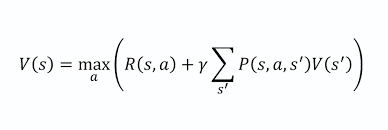

Where :

- R(s,a) : reward in state s, after taking action a. (Value initialization).
- P(s'|s,a) : Transition function , probability end up in s' if in s take a.
- V(s') : state s' value used to calculate s value.

Assuming ( gamma = 1), meaning reward now and later will be the same. short term


Iteration  : 

*"choosing the best action that maximize the V(s) each state"*

or

*"How Good being in That State Considering Reward that Can Get in the Future"*


#### First Iteration  :

*"Updating Value of a state considering each action and the reward can get, long term and short term"*

1. Start (S0) (1,1) :
- . Possible Action :
   - Rigth -> (S1) (1,2)
   - Left -> 0
   - Up -> 0
   - Down -> (S5) (2,1)

- V(S0) = R(S0,Right) + γ(P(S1|S0, Right).V(S1) + γ(P(S5|S0, Down)).V(S5)

- V(S0) = 0 + 1(1 x 0, 1 x 0) = 0


2 ..
..
.

...

#### Ninth Iteration : 

....

In [94]:
import pandas as pd
df = pd.read_csv("assets/value_iteration.csv")
df

,State,0,1,2,3,4,5,6,7,8,9
0,"S0(1,1)",0.0,0.0,0.00,0.000,0.0000,0.0000,0.0000,0.0000,0.9088,0.9088
1,"S1(1,2)",0.0,0.0,0.00,0.000,0.0000,0.0000,0.0000,1.0097,1.0097,1.0097
2,"S2(1,3)",0.0,0.0,0.00,0.000,0.0000,0.0000,1.1219,1.1219,1.1219,1.1219
3,"S3(1,4)",0.0,0.0,0.00,0.000,0.0000,1.2466,1.2466,1.2466,1.2466,1.2466
4,"S4(1,5)",0.0,0.0,0.00,0.000,0.0000,0.0000,1.1219,1.1219,1.1219,1.1219
5,"S5(2,1)",0.0,0.0,0.00,0.000,0.0000,0.0000,0.0000,1.0097,1.0097,1.0097
6,"S6(2,2)",-1.0,-1.0,-1.00,-1.000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000
7,"S7(2,3)",0.0,0.0,0.00,0.000,0.0000,1.2466,1.2466,1.2466,1.2466,1.2466
8,"S8(2,4)",0.0,0.0,0.00,0.000,1.3851,1.3851,1.3851,1.3851,1.3851,1.3851
9,"S9(2,5)",-1.0,-1.0,-1.00,-1.000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000


### Value Iteration Each State in HeatMaps

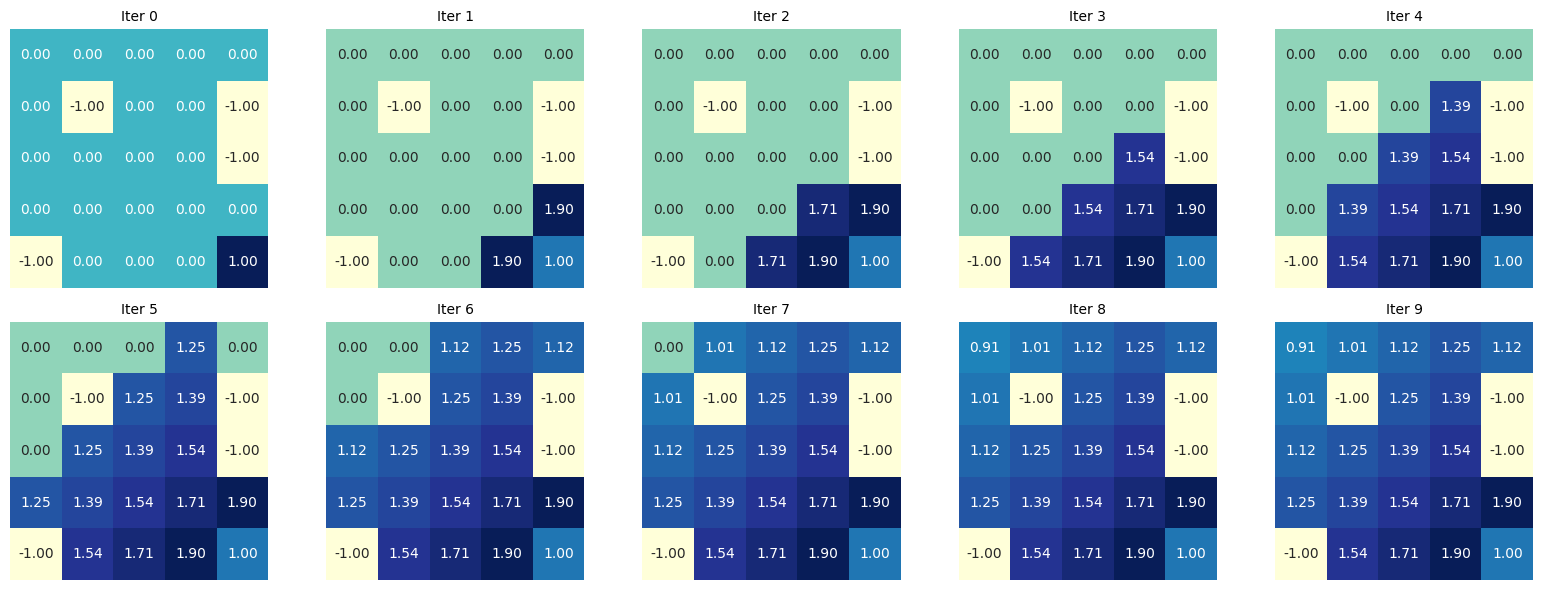

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the value iteration result
df = pd.read_csv("assets/value_iteration.csv", index_col=0)

# Plotting
fig, axes = plt.subplots(2, 5, figsize=(16, 6))
for ax, col in zip(axes.flat, df.columns):
    sns.heatmap(df[col].values.reshape(5, 5), annot=True, cmap='YlGnBu', fmt='.2f',
                cbar=False, xticklabels=False, yticklabels=False, square=True, ax=ax)
    ax.set_title(f'Iter {col}', fontsize=10)

plt.tight_layout()
plt.show()

## Policy Extraction

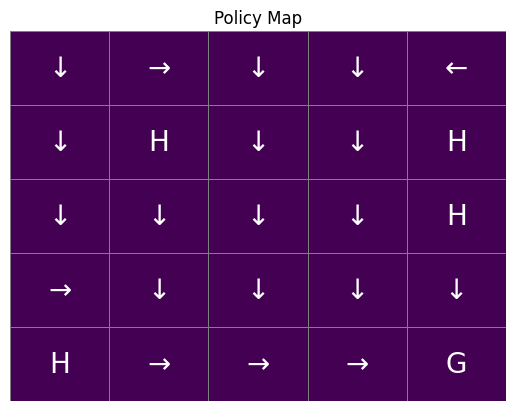

In [107]:
# Policy extraction
directions = {'up': '↑', 'down': '↓', 'left': '←', 'right': '→'}
policy = []
for s in range(25):
    if s == goal_state:
        policy.append('G')
    elif s in hole_states:
        policy.append('H')
    else:
        best = max(actions, key=lambda a: (1 if (n := get_next_state(s, a)) == goal_state else -1 if n in hole_states else 0) + gamma * V[n])
        policy.append(directions[best])

# Visualize policy
policy_grid = np.array(policy).reshape(5, 5)
sns.heatmap(np.zeros((5, 5)), cbar=False, annot=policy_grid, fmt='', 
            annot_kws={"size": 20}, linewidths=0.5, linecolor='gray', cmap='viridis')
plt.title("Policy Map")
plt.axis('off')
plt.show()

## Q Learning

*"not require the transition probabilities or the reward function explicitly"*